In [94]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from collections import defaultdict
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer

In [110]:
!pip install contractions

     |████████████████████████████████| 284 kB 6.1 MB/s eta 0:00:01
     |████████████████████████████████| 321 kB 9.0 MB/s eta 0:00:01
  Created wheel for pyahocorasick: filename=pyahocorasick-1.4.2-cp38-cp38-linux_x86_64.whl size=109552 sha256=9b3735ea52bc7f301bb43fe3b8e1660762e241f94c994708a76ede253540358a
  Stored in directory: /home/ekostrov/.cache/pip/wheels/74/bc/b8/e5f739a84005620cfe66d3fcb8bb182e309d6056bc6700b60e
Successfully built pyahocorasick


In [111]:
import pandas as pd
import numpy as np
import nltk
import string
import fasttext
import contractions
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords, wordnet


In [113]:
from nltk.stem import WordNetLemmatizer
plt.xticks(rotation=70)
pd.options.mode.chained_assignment = None
pd.set_option('display.max_colwidth', 100)
%matplotlib inline

In [122]:
df = pd.read_csv("data/test.csv")
df.head()

,article,label
0,The president has yet to clarify what victory over the pandemic looks likeSHAREPresident Joe Bid...,right
1,"SHARETo hear President Joe Biden tell it, the American evacuation from Afghanistan paralleled th...",right
2,SHAREThe mainstream media's honeymoon with President Joe Biden is over. And yet the media covera...,right
3,"The ""Squad"" makes a demand for which there is only a military solution SHAREFor the better part ...",right
4,The restraint crowd delivers America's humiliation in AfghanistanSHAREWhen the Quincy Institute ...,right


In [125]:
df.article = df.article.apply(lambda x: x.replace("SHARE", " "))
df.head(20)

,article,label
0,The president has yet to clarify what victory over the pandemic looks like President Joe Biden b...,right
1,"To hear President Joe Biden tell it, the American evacuation from Afghanistan paralleled the D-...",right
2,The mainstream media's honeymoon with President Joe Biden is over. And yet the media coverage o...,right
3,"The ""Squad"" makes a demand for which there is only a military solution For the better part of a...",right
4,The restraint crowd delivers America's humiliation in Afghanistan When the Quincy Institute for ...,right
5,Biden's $3.5 trillion budget was written by a socialist—and it shows The budget revealed by Sena...,right
6,Tourists must now provide proof of vaccination. Illegal immigrants get a free pass. For European...,right
7,The woke ice cream company veers into anti-Semitism The left-wing ice cream company Ben & Jerry...,right
8,"The Texas Democrats didn’t accomplish their mission, but they managed to expose the party’s glar...",right
9,The Democratic congresswoman says she has always been somebody who 'understands how words can be...,right


# NEW SECTION 

In [126]:
df['no_contract'] = df['article'].apply(lambda x: [contractions.fix(word) for word in x.split()])
df.head()

,article,label,no_contract
0,The president has yet to clarify what victory over the pandemic looks like President Joe Biden b...,right,"[The, president, has, yet, to, clarify, what, victory, over, the, pandemic, looks, like, Preside..."
1,"To hear President Joe Biden tell it, the American evacuation from Afghanistan paralleled the D-...",right,"[To, hear, President, Joe, Biden, tell, it,, the, American, evacuation, from, Afghanistan, paral..."
2,The mainstream media's honeymoon with President Joe Biden is over. And yet the media coverage o...,right,"[The, mainstream, media's, honeymoon, with, President, Joe, Biden, is, over., And, yet, the, med..."
3,"The ""Squad"" makes a demand for which there is only a military solution For the better part of a...",right,"[The, ""Squad"", makes, a, demand, for, which, there, is, only, a, military, solution, For, the, b..."
4,The restraint crowd delivers America's humiliation in Afghanistan When the Quincy Institute for ...,right,"[The, restraint, crowd, delivers, America's, humiliation, in, Afghanistan, When, the, Quincy, In..."


In [127]:
df['article_str'] = [' '.join(map(str, l)) for l in df['no_contract']]
df.head()

,article,label,no_contract,article_str
0,The president has yet to clarify what victory over the pandemic looks like President Joe Biden b...,right,"[The, president, has, yet, to, clarify, what, victory, over, the, pandemic, looks, like, Preside...",The president has yet to clarify what victory over the pandemic looks like President Joe Biden b...
1,"To hear President Joe Biden tell it, the American evacuation from Afghanistan paralleled the D-...",right,"[To, hear, President, Joe, Biden, tell, it,, the, American, evacuation, from, Afghanistan, paral...","To hear President Joe Biden tell it, the American evacuation from Afghanistan paralleled the D-D..."
2,The mainstream media's honeymoon with President Joe Biden is over. And yet the media coverage o...,right,"[The, mainstream, media's, honeymoon, with, President, Joe, Biden, is, over., And, yet, the, med...",The mainstream media's honeymoon with President Joe Biden is over. And yet the media coverage of...
3,"The ""Squad"" makes a demand for which there is only a military solution For the better part of a...",right,"[The, ""Squad"", makes, a, demand, for, which, there, is, only, a, military, solution, For, the, b...","The ""Squad"" makes a demand for which there is only a military solution For the better part of a ..."
4,The restraint crowd delivers America's humiliation in Afghanistan When the Quincy Institute for ...,right,"[The, restraint, crowd, delivers, America's, humiliation, in, Afghanistan, When, the, Quincy, In...",The restraint crowd delivers America's humiliation in Afghanistan When the Quincy Institute for ...


In [139]:
#Tokenization

In [131]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/ekostrov/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [132]:
df['tokenized'] = df['article_str'].apply(word_tokenize)

In [133]:
df.head()

,article,label,no_contract,article_str,tokenized
0,The president has yet to clarify what victory over the pandemic looks like President Joe Biden b...,right,"[The, president, has, yet, to, clarify, what, victory, over, the, pandemic, looks, like, Preside...",The president has yet to clarify what victory over the pandemic looks like President Joe Biden b...,"[The, president, has, yet, to, clarify, what, victory, over, the, pandemic, looks, like, Preside..."
1,"To hear President Joe Biden tell it, the American evacuation from Afghanistan paralleled the D-...",right,"[To, hear, President, Joe, Biden, tell, it,, the, American, evacuation, from, Afghanistan, paral...","To hear President Joe Biden tell it, the American evacuation from Afghanistan paralleled the D-D...","[To, hear, President, Joe, Biden, tell, it, ,, the, American, evacuation, from, Afghanistan, par..."
2,The mainstream media's honeymoon with President Joe Biden is over. And yet the media coverage o...,right,"[The, mainstream, media's, honeymoon, with, President, Joe, Biden, is, over., And, yet, the, med...",The mainstream media's honeymoon with President Joe Biden is over. And yet the media coverage of...,"[The, mainstream, media, 's, honeymoon, with, President, Joe, Biden, is, over, ., And, yet, the,..."
3,"The ""Squad"" makes a demand for which there is only a military solution For the better part of a...",right,"[The, ""Squad"", makes, a, demand, for, which, there, is, only, a, military, solution, For, the, b...","The ""Squad"" makes a demand for which there is only a military solution For the better part of a ...","[The, ``, Squad, '', makes, a, demand, for, which, there, is, only, a, military, solution, For, ..."
4,The restraint crowd delivers America's humiliation in Afghanistan When the Quincy Institute for ...,right,"[The, restraint, crowd, delivers, America's, humiliation, in, Afghanistan, When, the, Quincy, In...",The restraint crowd delivers America's humiliation in Afghanistan When the Quincy Institute for ...,"[The, restraint, crowd, delivers, America, 's, humiliation, in, Afghanistan, When, the, Quincy, ..."


In [137]:
# Converting all Characters to Lowercase

In [134]:
df['lower'] = df['tokenized'].apply(lambda x: [word.lower() for word in x])
df.head()

,article,label,no_contract,article_str,tokenized,lower
0,The president has yet to clarify what victory over the pandemic looks like President Joe Biden b...,right,"[The, president, has, yet, to, clarify, what, victory, over, the, pandemic, looks, like, Preside...",The president has yet to clarify what victory over the pandemic looks like President Joe Biden b...,"[The, president, has, yet, to, clarify, what, victory, over, the, pandemic, looks, like, Preside...","[the, president, has, yet, to, clarify, what, victory, over, the, pandemic, looks, like, preside..."
1,"To hear President Joe Biden tell it, the American evacuation from Afghanistan paralleled the D-...",right,"[To, hear, President, Joe, Biden, tell, it,, the, American, evacuation, from, Afghanistan, paral...","To hear President Joe Biden tell it, the American evacuation from Afghanistan paralleled the D-D...","[To, hear, President, Joe, Biden, tell, it, ,, the, American, evacuation, from, Afghanistan, par...","[to, hear, president, joe, biden, tell, it, ,, the, american, evacuation, from, afghanistan, par..."
2,The mainstream media's honeymoon with President Joe Biden is over. And yet the media coverage o...,right,"[The, mainstream, media's, honeymoon, with, President, Joe, Biden, is, over., And, yet, the, med...",The mainstream media's honeymoon with President Joe Biden is over. And yet the media coverage of...,"[The, mainstream, media, 's, honeymoon, with, President, Joe, Biden, is, over, ., And, yet, the,...","[the, mainstream, media, 's, honeymoon, with, president, joe, biden, is, over, ., and, yet, the,..."
3,"The ""Squad"" makes a demand for which there is only a military solution For the better part of a...",right,"[The, ""Squad"", makes, a, demand, for, which, there, is, only, a, military, solution, For, the, b...","The ""Squad"" makes a demand for which there is only a military solution For the better part of a ...","[The, ``, Squad, '', makes, a, demand, for, which, there, is, only, a, military, solution, For, ...","[the, ``, squad, '', makes, a, demand, for, which, there, is, only, a, military, solution, for, ..."
4,The restraint crowd delivers America's humiliation in Afghanistan When the Quincy Institute for ...,right,"[The, restraint, crowd, delivers, America's, humiliation, in, Afghanistan, When, the, Quincy, In...",The restraint crowd delivers America's humiliation in Afghanistan When the Quincy Institute for ...,"[The, restraint, crowd, delivers, America, 's, humiliation, in, Afghanistan, When, the, Quincy, ...","[the, restraint, crowd, delivers, america, 's, humiliation, in, afghanistan, when, the, quincy, ..."


In [ ]:
# Punctuations

In [135]:
punc = string.punctuation

In [136]:
df['no_punc'] = df['lower'].apply(lambda x: [word for word in x if word not in punc])
df.head()

,article,label,no_contract,article_str,tokenized,lower,no_punc
0,The president has yet to clarify what victory over the pandemic looks like President Joe Biden b...,right,"[The, president, has, yet, to, clarify, what, victory, over, the, pandemic, looks, like, Preside...",The president has yet to clarify what victory over the pandemic looks like President Joe Biden b...,"[The, president, has, yet, to, clarify, what, victory, over, the, pandemic, looks, like, Preside...","[the, president, has, yet, to, clarify, what, victory, over, the, pandemic, looks, like, preside...","[the, president, has, yet, to, clarify, what, victory, over, the, pandemic, looks, like, preside..."
1,"To hear President Joe Biden tell it, the American evacuation from Afghanistan paralleled the D-...",right,"[To, hear, President, Joe, Biden, tell, it,, the, American, evacuation, from, Afghanistan, paral...","To hear President Joe Biden tell it, the American evacuation from Afghanistan paralleled the D-D...","[To, hear, President, Joe, Biden, tell, it, ,, the, American, evacuation, from, Afghanistan, par...","[to, hear, president, joe, biden, tell, it, ,, the, american, evacuation, from, afghanistan, par...","[to, hear, president, joe, biden, tell, it, the, american, evacuation, from, afghanistan, parall..."
2,The mainstream media's honeymoon with President Joe Biden is over. And yet the media coverage o...,right,"[The, mainstream, media's, honeymoon, with, President, Joe, Biden, is, over., And, yet, the, med...",The mainstream media's honeymoon with President Joe Biden is over. And yet the media coverage of...,"[The, mainstream, media, 's, honeymoon, with, President, Joe, Biden, is, over, ., And, yet, the,...","[the, mainstream, media, 's, honeymoon, with, president, joe, biden, is, over, ., and, yet, the,...","[the, mainstream, media, 's, honeymoon, with, president, joe, biden, is, over, and, yet, the, me..."
3,"The ""Squad"" makes a demand for which there is only a military solution For the better part of a...",right,"[The, ""Squad"", makes, a, demand, for, which, there, is, only, a, military, solution, For, the, b...","The ""Squad"" makes a demand for which there is only a military solution For the better part of a ...","[The, ``, Squad, '', makes, a, demand, for, which, there, is, only, a, military, solution, For, ...","[the, ``, squad, '', makes, a, demand, for, which, there, is, only, a, military, solution, for, ...","[the, ``, squad, '', makes, a, demand, for, which, there, is, only, a, military, solution, for, ..."
4,The restraint crowd delivers America's humiliation in Afghanistan When the Quincy Institute for ...,right,"[The, restraint, crowd, delivers, America's, humiliation, in, Afghanistan, When, the, Quincy, In...",The restraint crowd delivers America's humiliation in Afghanistan When the Quincy Institute for ...,"[The, restraint, crowd, delivers, America, 's, humiliation, in, Afghanistan, When, the, Quincy, ...","[the, restraint, crowd, delivers, america, 's, humiliation, in, afghanistan, when, the, quincy, ...","[the, restraint, crowd, delivers, america, 's, humiliation, in, afghanistan, when, the, quincy, ..."


In [140]:
# Stop words

In [141]:
stop_words = set(stopwords.words('english'))

In [142]:
df['stopwords_removed'] = df['no_punc'].apply(lambda x: [word for word in x if word not in stop_words])
df.head()

,article,label,no_contract,article_str,tokenized,lower,no_punc,stopwords_removed
0,The president has yet to clarify what victory over the pandemic looks like President Joe Biden b...,right,"[The, president, has, yet, to, clarify, what, victory, over, the, pandemic, looks, like, Preside...",The president has yet to clarify what victory over the pandemic looks like President Joe Biden b...,"[The, president, has, yet, to, clarify, what, victory, over, the, pandemic, looks, like, Preside...","[the, president, has, yet, to, clarify, what, victory, over, the, pandemic, looks, like, preside...","[the, president, has, yet, to, clarify, what, victory, over, the, pandemic, looks, like, preside...","[president, yet, clarify, victory, pandemic, looks, like, president, joe, biden, began, coronavi..."
1,"To hear President Joe Biden tell it, the American evacuation from Afghanistan paralleled the D-...",right,"[To, hear, President, Joe, Biden, tell, it,, the, American, evacuation, from, Afghanistan, paral...","To hear President Joe Biden tell it, the American evacuation from Afghanistan paralleled the D-D...","[To, hear, President, Joe, Biden, tell, it, ,, the, American, evacuation, from, Afghanistan, par...","[to, hear, president, joe, biden, tell, it, ,, the, american, evacuation, from, afghanistan, par...","[to, hear, president, joe, biden, tell, it, the, american, evacuation, from, afghanistan, parall...","[hear, president, joe, biden, tell, american, evacuation, afghanistan, paralleled, d-day, invasi..."
2,The mainstream media's honeymoon with President Joe Biden is over. And yet the media coverage o...,right,"[The, mainstream, media's, honeymoon, with, President, Joe, Biden, is, over., And, yet, the, med...",The mainstream media's honeymoon with President Joe Biden is over. And yet the media coverage of...,"[The, mainstream, media, 's, honeymoon, with, President, Joe, Biden, is, over, ., And, yet, the,...","[the, mainstream, media, 's, honeymoon, with, president, joe, biden, is, over, ., and, yet, the,...","[the, mainstream, media, 's, honeymoon, with, president, joe, biden, is, over, and, yet, the, me...","[mainstream, media, 's, honeymoon, president, joe, biden, yet, media, coverage, twin, crises, fa..."
3,"The ""Squad"" makes a demand for which there is only a military solution For the better part of a...",right,"[The, ""Squad"", makes, a, demand, for, which, there, is, only, a, military, solution, For, the, b...","The ""Squad"" makes a demand for which there is only a military solution For the better part of a ...","[The, ``, Squad, '', makes, a, demand, for, which, there, is, only, a, military, solution, For, ...","[the, ``, squad, '', makes, a, demand, for, which, there, is, only, a, military, solution, for, ...","[the, ``, squad, '', makes, a, demand, for, which, there, is, only, a, military, solution, for, ...","[``, squad, '', makes, demand, military, solution, better, part, decade, washington, free, beaco..."
4,The restraint crowd delivers America's humiliation in Afghanistan When the Quincy Institute for ...,right,"[The, restraint, crowd, delivers, America's, humiliation, in, Afghanistan, When, the, Quincy, In...",The restraint crowd delivers America's humiliation in Afghanistan When the Quincy Institute for ...,"[The, restraint, crowd, delivers, America, 's, humiliation, in, Afghanistan, When, the, Quincy, ...","[the, restraint, crowd, delivers, america, 's, humiliation, in, afghanistan, when, the, quincy, ...","[the, restraint, crowd, delivers, america, 's, humiliation, in, afghanistan, when, the, quincy, ...","[restraint, crowd, delivers, america, 's, humiliation, afghanistan, quincy, institute, responsib..."


In [144]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/ekostrov/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [145]:
df['pos_tags'] = df['stopwords_removed'].apply(nltk.tag.pos_tag)
df.head()

,article,label,no_contract,article_str,tokenized,lower,no_punc,stopwords_removed,pos_tags
0,The president has yet to clarify what victory over the pandemic looks like President Joe Biden b...,right,"[The, president, has, yet, to, clarify, what, victory, over, the, pandemic, looks, like, Preside...",The president has yet to clarify what victory over the pandemic looks like President Joe Biden b...,"[The, president, has, yet, to, clarify, what, victory, over, the, pandemic, looks, like, Preside...","[the, president, has, yet, to, clarify, what, victory, over, the, pandemic, looks, like, preside...","[the, president, has, yet, to, clarify, what, victory, over, the, pandemic, looks, like, preside...","[president, yet, clarify, victory, pandemic, looks, like, president, joe, biden, began, coronavi...","[(president, NN), (yet, RB), (clarify, JJ), (victory, NN), (pandemic, JJ), (looks, NNS), (like, ..."
1,"To hear President Joe Biden tell it, the American evacuation from Afghanistan paralleled the D-...",right,"[To, hear, President, Joe, Biden, tell, it,, the, American, evacuation, from, Afghanistan, paral...","To hear President Joe Biden tell it, the American evacuation from Afghanistan paralleled the D-D...","[To, hear, President, Joe, Biden, tell, it, ,, the, American, evacuation, from, Afghanistan, par...","[to, hear, president, joe, biden, tell, it, ,, the, american, evacuation, from, afghanistan, par...","[to, hear, president, joe, biden, tell, it, the, american, evacuation, from, afghanistan, parall...","[hear, president, joe, biden, tell, american, evacuation, afghanistan, paralleled, d-day, invasi...","[(hear, JJ), (president, NN), (joe, NNS), (biden, VBP), (tell, VB), (american, JJ), (evacuation,..."
2,The mainstream media's honeymoon with President Joe Biden is over. And yet the media coverage o...,right,"[The, mainstream, media's, honeymoon, with, President, Joe, Biden, is, over., And, yet, the, med...",The mainstream media's honeymoon with President Joe Biden is over. And yet the media coverage of...,"[The, mainstream, media, 's, honeymoon, with, President, Joe, Biden, is, over, ., And, yet, the,...","[the, mainstream, media, 's, honeymoon, with, president, joe, biden, is, over, ., and, yet, the,...","[the, mainstream, media, 's, honeymoon, with, president, joe, biden, is, over, and, yet, the, me...","[mainstream, media, 's, honeymoon, president, joe, biden, yet, media, coverage, twin, crises, fa...","[(mainstream, JJ), (media, NNS), ('s, POS), (honeymoon, NN), (president, NN), (joe, NN), (biden,..."
3,"The ""Squad"" makes a demand for which there is only a military solution For the better part of a...",right,"[The, ""Squad"", makes, a, demand, for, which, there, is, only, a, military, solution, For, the, b...","The ""Squad"" makes a demand for which there is only a military solution For the better part of a ...","[The, ``, Squad, '', makes, a, demand, for, which, there, is, only, a, military, solution, For, ...","[the, ``, squad, '', makes, a, demand, for, which, there, is, only, a, military, solution, for, ...","[the, ``, squad, '', makes, a, demand, for, which, there, is, only, a, military, solution, for, ...","[``, squad, '', makes, demand, military, solution, better, part, decade, washington, free, beaco...","[(``, ``), (squad, NN), ('', ''), (makes, VBZ), (demand, NN), (military, JJ), (solution, NN), (b..."
4,The restraint crowd delivers America's humiliation in Afghanistan When the Quincy Institute for ...,right,"[The, restraint, crowd, delivers, America's, humiliation, in, Afghanistan, When, the, Quincy, In...",The restraint crowd delivers America's humiliation in Afghanistan When the Quincy Institute for ...,"[The, restraint, crowd, delivers, America, 's, humiliation, in, Afghanistan, When, the, Quincy, ...","[the, restraint, crowd, delivers, america, 's, humiliation, in, afghanistan, when, the, quincy, ...","[the, restraint, crowd, delivers, america, 's, humiliation, in, afghanistan, when, the, quincy, ...","[r

In [146]:
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [148]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /home/ekostrov/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [149]:
df['wordnet_pos'] = df['pos_tags'].apply(
    lambda x: [
        (word, get_wordnet_pos(pos_tag)) for (word, pos_tag) in x])
df.head()

,article,label,no_contract,article_str,tokenized,lower,no_punc,stopwords_removed,pos_tags,wordnet_pos
0,The president has yet to clarify what victory over the pandemic looks like President Joe Biden b...,right,"[The, president, has, yet, to, clarify, what, victory, over, the, pandemic, looks, like, Preside...",The president has yet to clarify what victory over the pandemic looks like President Joe Biden b...,"[The, president, has, yet, to, clarify, what, victory, over, the, pandemic, looks, like, Preside...","[the, president, has, yet, to, clarify, what, victory, over, the, pandemic, looks, like, preside...","[the, president, has, yet, to, clarify, what, victory, over, the, pandemic, looks, like, preside...","[president, yet, clarify, victory, pandemic, looks, like, president, joe, biden, began, coronavi...","[(president, NN), (yet, RB), (clarify, JJ), (victory, NN), (pandemic, JJ), (looks, NNS), (like, ...","[(president, n), (yet, r), (clarify, a), (victory, n), (pandemic, a), (looks, n), (like, n), (pr..."
1,"To hear President Joe Biden tell it, the American evacuation from Afghanistan paralleled the D-...",right,"[To, hear, President, Joe, Biden, tell, it,, the, American, evacuation, from, Afghanistan, paral...","To hear President Joe Biden tell it, the American evacuation from Afghanistan paralleled the D-D...","[To, hear, President, Joe, Biden, tell, it, ,, the, American, evacuation, from, Afghanistan, par...","[to, hear, president, joe, biden, tell, it, ,, the, american, evacuation, from, afghanistan, par...","[to, hear, president, joe, biden, tell, it, the, american, evacuation, from, afghanistan, parall...","[hear, president, joe, biden, tell, american, evacuation, afghanistan, paralleled, d-day, invasi...","[(hear, JJ), (president, NN), (joe, NNS), (biden, VBP), (tell, VB), (american, JJ), (evacuation,...","[(hear, a), (president, n), (joe, n), (biden, v), (tell, v), (american, a), (evacuation, n), (af..."
2,The mainstream media's honeymoon with President Joe Biden is over. And yet the media coverage o...,right,"[The, mainstream, media's, honeymoon, with, President, Joe, Biden, is, over., And, yet, the, med...",The mainstream media's honeymoon with President Joe Biden is over. And yet the media coverage of...,"[The, mainstream, media, 's, honeymoon, with, President, Joe, Biden, is, over, ., And, yet, the,...","[the, mainstream, media, 's, honeymoon, with, president, joe, biden, is, over, ., and, yet, the,...","[the, mainstream, media, 's, honeymoon, with, president, joe, biden, is, over, and, yet, the, me...","[mainstream, media, 's, honeymoon, president, joe, biden, yet, media, coverage, twin, crises, fa...","[(mainstream, JJ), (media, NNS), ('s, POS), (honeymoon, NN), (president, NN), (joe, NN), (biden,...","[(mainstream, a), (media, n), ('s, n), (honeymoon, n), (president, n), (joe, n), (biden, n), (ye..."
3,"The ""Squad"" makes a demand for which there is only a military solution For the better part of a...",right,"[The, ""Squad"", makes, a, demand, for, which, there, is, only, a, military, solution, For, the, b...","The ""Squad"" makes a demand for which there is only a military solution For the better part of a ...","[The, ``, Squad, '', makes, a, demand, for, which, there, is, only, a, military, solution, For, ...","[the, ``, squad, '', makes, a, demand, for, which, there, is, only, a, military, solution, for, ...","[the, ``, squad, '', makes, a, demand, for, which, there, is, only, a, military, solution, for, ...","[``, squad, '', makes, demand, military, solution, better, part, decade, washington, free, beaco...","[(``, ``), (squad, NN), ('', ''), (makes, VBZ), (demand, NN), (military, JJ), (solution, NN), (b...","[(``, n), (squad, n), ('', n), (makes, v), (demand, n), (military, a), (solution, n), (better, r..."
4,The restraint crowd delivers America's humiliation in Afghanistan When the Quincy Institute for ...,right,"[The, restraint, crowd, delivers, America's, humiliation, in, Afghanistan, When, the, Quin

In [150]:
wnl = WordNetLemmatizer()

In [151]:
df['lemmalized'] = df['wordnet_pos'].apply(lambda x:
                                          [wnl.lemmatize(word, tag) for word, tag in x])
df.head()

,article,label,no_contract,article_str,tokenized,lower,no_punc,stopwords_removed,pos_tags,wordnet_pos,lemmalized
0,The president has yet to clarify what victory over the pandemic looks like President Joe Biden b...,right,"[The, president, has, yet, to, clarify, what, victory, over, the, pandemic, looks, like, Preside...",The president has yet to clarify what victory over the pandemic looks like President Joe Biden b...,"[The, president, has, yet, to, clarify, what, victory, over, the, pandemic, looks, like, Preside...","[the, president, has, yet, to, clarify, what, victory, over, the, pandemic, looks, like, preside...","[the, president, has, yet, to, clarify, what, victory, over, the, pandemic, looks, like, preside...","[president, yet, clarify, victory, pandemic, looks, like, president, joe, biden, began, coronavi...","[(president, NN), (yet, RB), (clarify, JJ), (victory, NN), (pandemic, JJ), (looks, NNS), (like, ...","[(president, n), (yet, r), (clarify, a), (victory, n), (pandemic, a), (looks, n), (like, n), (pr...","[president, yet, clarify, victory, pandemic, look, like, president, joe, biden, begin, coronavir..."
1,"To hear President Joe Biden tell it, the American evacuation from Afghanistan paralleled the D-...",right,"[To, hear, President, Joe, Biden, tell, it,, the, American, evacuation, from, Afghanistan, paral...","To hear President Joe Biden tell it, the American evacuation from Afghanistan paralleled the D-D...","[To, hear, President, Joe, Biden, tell, it, ,, the, American, evacuation, from, Afghanistan, par...","[to, hear, president, joe, biden, tell, it, ,, the, american, evacuation, from, afghanistan, par...","[to, hear, president, joe, biden, tell, it, the, american, evacuation, from, afghanistan, parall...","[hear, president, joe, biden, tell, american, evacuation, afghanistan, paralleled, d-day, invasi...","[(hear, JJ), (president, NN), (joe, NNS), (biden, VBP), (tell, VB), (american, JJ), (evacuation,...","[(hear, a), (president, n), (joe, n), (biden, v), (tell, v), (american, a), (evacuation, n), (af...","[hear, president, joe, biden, tell, american, evacuation, afghanistan, parallel, d-day, invasion..."
2,The mainstream media's honeymoon with President Joe Biden is over. And yet the media coverage o...,right,"[The, mainstream, media's, honeymoon, with, President, Joe, Biden, is, over., And, yet, the, med...",The mainstream media's honeymoon with President Joe Biden is over. And yet the media coverage of...,"[The, mainstream, media, 's, honeymoon, with, President, Joe, Biden, is, over, ., And, yet, the,...","[the, mainstream, media, 's, honeymoon, with, president, joe, biden, is, over, ., and, yet, the,...","[the, mainstream, media, 's, honeymoon, with, president, joe, biden, is, over, and, yet, the, me...","[mainstream, media, 's, honeymoon, president, joe, biden, yet, media, coverage, twin, crises, fa...","[(mainstream, JJ), (media, NNS), ('s, POS), (honeymoon, NN), (president, NN), (joe, NN), (biden,...","[(mainstream, a), (media, n), ('s, n), (honeymoon, n), (president, n), (joe, n), (biden, n), (ye...","[mainstream, medium, 's, honeymoon, president, joe, biden, yet, medium, coverage, twin, crisis, ..."
3,"The ""Squad"" makes a demand for which there is only a military solution For the better part of a...",right,"[The, ""Squad"", makes, a, demand, for, which, there, is, only, a, military, solution, For, the, b...","The ""Squad"" makes a demand for which there is only a military solution For the better part of a ...","[The, ``, Squad, '', makes, a, demand, for, which, there, is, only, a, military, solution, For, ...","[the, ``, squad, '', makes, a, demand, for, which, there, is, only, a, military, solution, for, ...","[the, ``, squad, '', makes, a, demand, for, which, there, is, only, a, military, solution, for, ...","[``, squad, '', makes, demand, military, solution, better, part, decade, washington, free, beaco...","[(``, ``), (squad, NN), ('', ''), (makes, VBZ), (demand, NN), (military, JJ), (soluti

In [152]:
df.to_csv('data/cleaned_test.csv')

# NEW SECTION 

In [72]:
df.article = df.article.apply(lambda x: x.lower())

<AxesSubplot:>

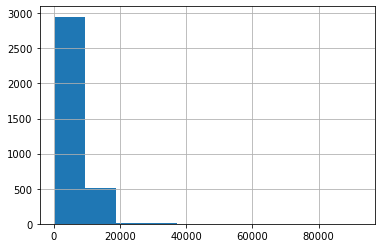

In [73]:
# umber of characters present in each sentence
df.article.str.len().hist()

<AxesSubplot:>

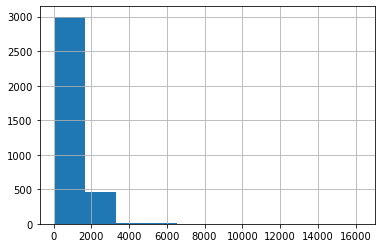

In [74]:
# number of words appearing in each article
df.article.str.split().map(lambda x: len(x)).hist()

<AxesSubplot:>

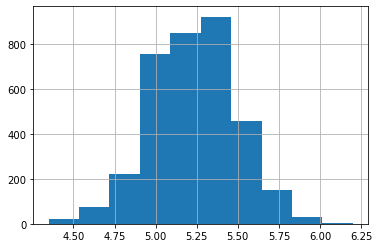

In [75]:
#the average word length in each sentence.
df.article.str.split().apply(lambda x: [len(i) for i in x]).map(lambda x: np.mean(x)).hist()

In [76]:
"""
To get the corpus containing stopwords
you can use the nltk library.
Nltk contains stopwords from many languages.
Since we are only dealing with English news 
I will filter the English stopwords from the corpus.
"""

'\nTo get the corpus containing stopwords\nyou can use the nltk library.\nNltk contains stopwords from many languages.\nSince we are only dealing with English news \nI will filter the English stopwords from the corpus.\n'

In [77]:
stopwords.words('english')


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [78]:
stop = set(stopwords.words('english'))

In [79]:
corpus = []
article = df.article.str.split()
article = article.values.tolist()
corpus = [word for i in article for word in i]

In [80]:
dictionary = defaultdict(int)

In [81]:
for word in corpus:
    if word in stop:
        dictionary[word] += 1

<BarContainer object of 10 artists>

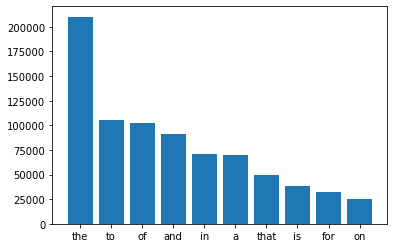

In [85]:
top=sorted(dictionary.items(), key=lambda x:x[1],reverse=True)[:10] 
x,y=zip(*top)
plt.bar(x,y)

In [86]:
"""
we know which stopwords occur frequently in our text,
let’s inspect which words other than these stopwords
occur frequently.
"""

'\nwe know which stopwords occur frequently in our text,\nlet’s inspect which words other than these stopwords\noccur frequently.\n'

In [87]:
counter = Counter(corpus)
most = counter.most_common()

In [88]:
x,y = [],[]

<AxesSubplot:>

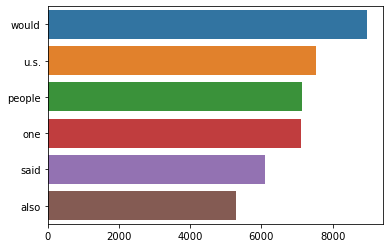

In [91]:
counter=Counter(corpus)
most=counter.most_common()

x, y= [], []
for word,count in most[:60]:
    if (word not in stop):
        x.append(word)
        y.append(count)
        
sns.barplot(x=y,y=x)

In [92]:
from nltk.util import ngrams
list(ngrams(['I' ,'went','to','the','river','bank'],2))

[('I', 'went'),
 ('went', 'to'),
 ('to', 'the'),
 ('the', 'river'),
 ('river', 'bank')]

In [93]:
"""
To build a representation of our vocabulary
we will use Countvectorizer. Countvectorizer
is a simple method used to tokenize, vectorize
and represent the corpus in an appropriate form. It is available 
"""

'\nTo build a representation of our vocabulary\nwe will use Countvectorizer. Countvectorizer\nis a simple method used to tokenize, vectorize\nand represent the corpus in an appropriate form. It is available \n'

In [95]:
def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) 
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:10]

In [96]:
top_n_bigrams = get_top_ngram(df.article,2)[:10]

In [97]:
x,y = map(list,zip(*top_n_bigrams))

<AxesSubplot:>

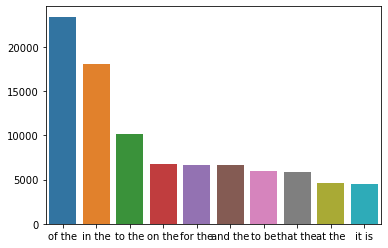

In [98]:
sns.barplot(x=x, y=y)

In [101]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)


In [103]:
def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)
    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

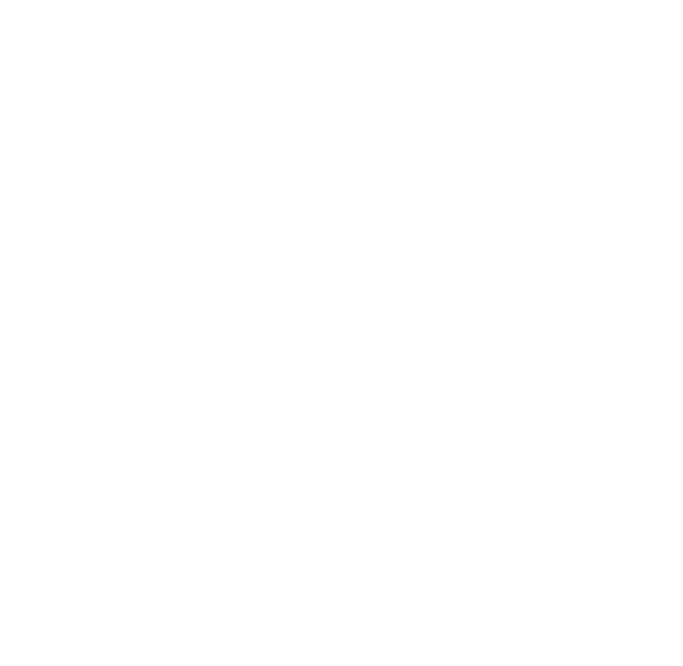

In [104]:
show_wordcloud(corpus)